#Linear Discriminant Analysis


1.   The LDA is an Supervised Learning Technique
2.   They are used only for classification and not regression
3.   As its a linear classifier, it can be implemented on the data which is Linear seperable
4.   LDA Alogrithm also reduces dimensionality to get the optimum line where the points are not overlapped

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

### Import Dataset

In [2]:
digit = datasets.load_digits()

In [7]:
digit.feature_names # 8 * 8 pixel

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [12]:
digit.images # Images in array format

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

### Visualize the Dataset

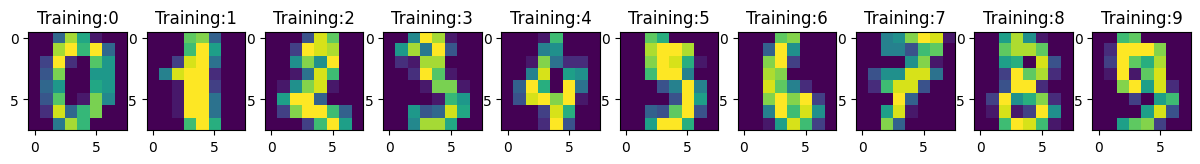

In [13]:
fig,ax = plt.subplots(nrows=1,ncols=10,figsize=(15,5))
for ax, images,y in zip(ax,digit.images,digit.target):
  ax.imshow(images,interpolation = 'nearest')
  ax.set_axis_off
  ax.set_title(f"Training:{y}")

### Define the X & Y

In [15]:
X = digit.data
y = digit.target

In [16]:
X.ndim

2

In [17]:
X.shape

(1797, 64)

### Split the test and train data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Scaling the data :

1.   Fit and Transform the train data
2.   Transform thje test data



In [19]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

### Checking the accuracy of model based on the components

Here accuracy does not vary based on the number of components. Threfore with 2 components its sufficient for modeling. Please note the components cannot be larger than min(n_features, n_classes - 1) i.e min(64,10-1)

In [22]:
score = []
for i in range(2,10):
  lda_model = LinearDiscriminantAnalysis(n_components=i)
  lda_model.fit(X_train,y_train)
  y_pred = lda_model.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))
score

[0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444]

### Building the Model

In [ ]:
lda_model = LinearDiscriminantAnalysis(n_components=2) # only 2 components are considered
lda_fit = lda_model.fit_transform(X_train,y_train)
y_pred = lda_model.predict(X_test)

### Model Evaluation

The f1-score is good for all classes

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.83      0.89      0.86        28
           2       0.97      0.94      0.95        33
           3       0.94      0.97      0.96        34
           4       1.00      0.96      0.98        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.93      0.87      0.90        30
           9       0.88      0.90      0.89        40

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



### Visualizing the Misclassified images

In [ ]:
def get_misclassifed_index(y_pred,y_test):
    misclassification=[]
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
    return misclassification

In [ ]:
get_misclassification=get_misclassifed_index(y_pred,y_test)

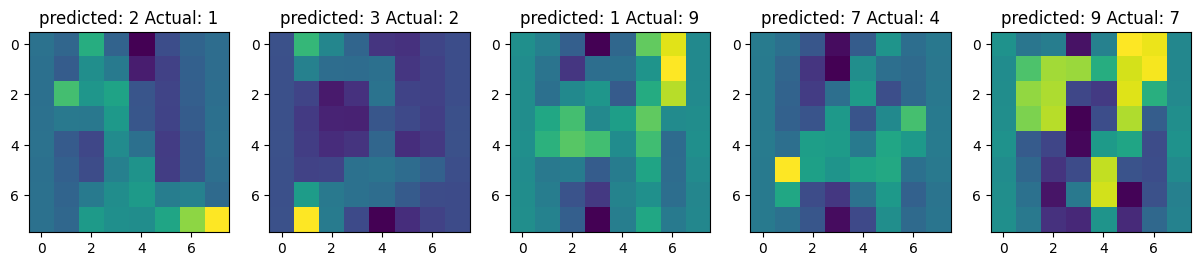

In [ ]:
plt.figure(figsize=(15,5))
for index,wrong in enumerate(get_misclassification[0:5]):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)))
    plt.title('predicted: {} Actual: {}'.format(y_pred[wrong],y_test[wrong]))

### Model Parameters

In [23]:
print('Components:',lda_model.n_components)
print('Explained Variance:',lda_model.explained_variance_ratio_)
print('Input Features:',lda_model.n_features_in_)

Components: 9
Explained Variance: [0.27851663 0.19023768 0.17379022 0.11077975 0.08773235 0.0654018
 0.04249174 0.02968284 0.02136698]
Input Features: 64


### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 25  1  0  0  0  0  0  0  2]
 [ 0  0 31  2  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  0  1  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 34  0  0  1]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  3  0  0  0  1  0  0 26  0]
 [ 0  1  0  0  0  1  0  0  2 36]]


### Decision Boundries

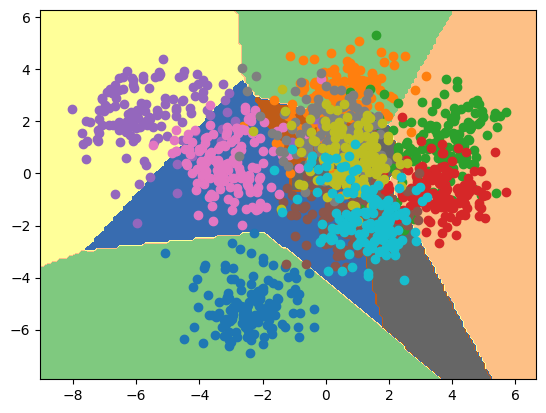

In [ ]:
min1,max1 = lda_fit[:,0].min()-1, lda_fit[:,0].max()+1
min2,max2 = lda_fit[:,1].min()-1,lda_fit[:,1].max()+1
x1grid = np.arange(min1,max1,0.1)
x2grid = np.arange(min2,max2,0.1)
xx,yy = np.meshgrid(x1grid,x2grid)
r1,r2 = xx.flatten(),yy.flatten()
r1,r2 = r1.reshape((len(r1),1)), r2.reshape((len(r2),1))
grid = np.hstack((r1,r2))

model = LinearDiscriminantAnalysis()
model.fit(lda_fit,y_train)
yhat = model.predict(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx,yy,zz,cmap='Accent')

for class_value in range(10):
  row_ix = np.where( y_train== class_value)
  plt.scatter(lda_fit[row_ix,0],lda_fit[row_ix,1])

### LDA components

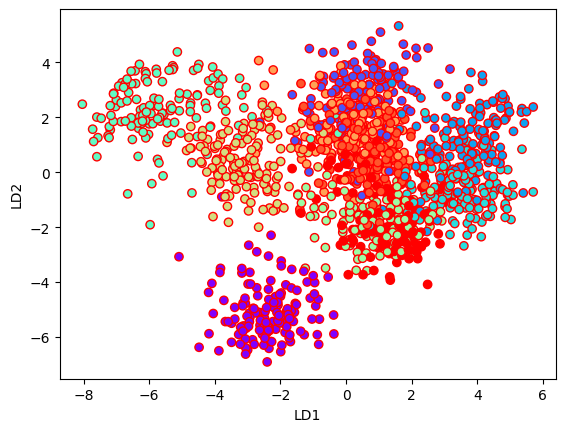

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(lda_fit[:,0],lda_fit[:,1],c=y_train,cmap='rainbow',edgecolors='r')